In [3]:
#tensorflow basic command
#TensorFlow is based on graph based computation.It’s an alternative way of conceptualising mathematical calculations.
#Consider the following expression a = (b+c)* (c+2).
#We can break this function down into the following components:
'''
d = b+c
e = c+2
a = d*e

'''

'\nTensorFlow is based on graph based computation.It’s an alternative way of conceptualising mathematical calculations.\nConsider the following expression a = (b+c)* (c+2).\nWe can break this function down into the following components:\n\td = b+c\n\te = c+2\n\ta = d*e\n'

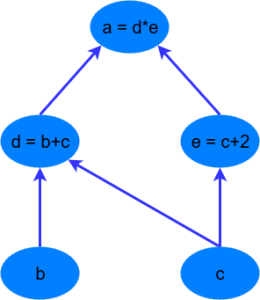

In [ ]:

#Let’s first make TensorFlow perform our little example calculation above.
import tensorflow as tf
# first, create a TensorFlow constant
const = tf.constant(2.0, name="const")
    
# create TensorFlow variables
b = tf.Variable(2.0, name='b')
c = tf.Variable(1.0, name='c')
# now create some operations
d = tf.add(b, c, name='d')
e = tf.add(c, const, name='e')
a = tf.multiply(d, e, name='a')

#The next step is to setup an object to initialise the variables and the graph structure
# setup the variable initialisation
init_op = tf.global_variables_initializer()

#To run the operations between the variables, we need to start a TensorFlow session – tf.Session.
#The TensorFlow session is an object where all operations are run. TensorFlow was initially created in a static graph paradigm – in other words, first 
#all the operations and variables are defined (the graph structure) and then these are compiled within the tf.Session object.
#There is now the option to build graphs on the fly using the TensorFlow Eager framework.
#However, there are still advantages in building static graphs using the tf.Session object.
# start the session
with tf.Session() as sess:
    # initialise the variables
    sess.run(init_op)
    # compute the output of the graph
    a_out = sess.run(a)
    print("Variable a is {}".format(a_out))

In [ ]:
# TensorFlow placeholder
#Let’s also say that we didn’t know what the value of the array b would be during the declaration phase of the TensorFlow problem.
# In this case, TensorFlow requires us to declare the basic structure of the data by using the tf.placeholder variable declaration.
#Let’s use it for b:
# create TensorFlow variables
b = tf.placeholder(tf.float32, [None, 1], name='b')

#Because we aren’t providing an initialisation in this declaration, we need to tell TensorFlow what data type each element within the tensor is going to be.
#In this case, we want to use tf.float32.
#The second argument is the shape of the data that will be “injected” into this variable.  In this case, we want to use a (? x 1) sized array
#the placeholder is willing to accept a None argument in the size declaration.  Now we can inject as much 1-dimensional data that we want into the b variable.
#The only other change we need to make to our program is in the sess.run(a,…) command:
a_out = sess.run(a, feed_dict={b: np.arange(0, 10)[:, np.newaxis]})
#As suggested by the argument name, feed_dict, the input to be supplied is a Python dictionary, with each key being the name of the placeholder that we are filling.

#Simple three layer neural network
#This MNIST dataset is a set of 28×28 pixel grayscale images which represent hand-written digits.  It has 55,000 training rows, 10,000 testing rows and 5,000 validation rows.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#The one_hot=True argument specifies that instead of the labels associated with each image being the 
#digit itself i.e. “4”, it is a vector with “one hot” node and all the other nodes being zero i.e. [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].  This lets us easily feed it into the output layer of our neural network.
# Python optimisation variables
learning_rate = 0.5
epochs = 10
batch_size = 100

# declare the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 10 digits
y = tf.placeholder(tf.float32, [None, 10])

#Notice the x input layer is 784 nodes corresponding to the 28 x 28 (=784) pixels, and the y output layer is 10 nodes corresponding to the 10 possible digits.
# the size of x is (? x 784), where the ? stands for an as yet unspecified number of samples to be input – this is the function of the placeholder variable.
#Now we need to setup the weight and bias variables for the three layer neural network.  
#There are always L-1 number of weights/bias tensors, where L is the number of layers.  So in this case, we need to setup two tensors for each:
# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([784, 300], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([300]), name='b1')
# and the weights connecting the hidden layer to the output layer
W2 = tf.Variable(tf.random_normal([300, 10], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([10]), name='b2')

#First, we declare some variables for W1 and b1, the weights and bias for the connections between the input and hidden layer.
#This neural network will have 300 nodes in the hidden layer, so the size of the weight tensor W1 is [784, 300].
# We initialise the values of the weights using a random normal distribution with a mean of zero and a standard deviation of 0.03.
#Likewise, we create W2 and b2 variables to connect the hidden layer to the output layer of the neural network.
#Next, we have to setup node inputs and activation functions of the hidden layer nodes:


# calculate the output of the hidden layer
hidden_out = tf.add(tf.matmul(x, W1), b1)
hidden_out = tf.nn.relu(hidden_out)

#Now, let’s setup the output layer, y_:
# now calculate the hidden layer output - in this case, let's use a softmax activated
# output layer
y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out, W2), b2))

#We also have to include a cost or loss function for the optimisation / backpropagation to work on.
y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))
# The first line is an operation converting the output y_ to a clipped version, limited between 1e-10 to 0.999999. 
# This is to make sure that we never get a case were we have a log(0) operation occurring during training
#this would return NaN and break the training process.  The second line is the cross entropy calculation.
#To perform this calculation, first we use TensorFlow’s tf.reduce_sum function – this function basically takes the sum of a given axis of the tensor you supply.
#In this case, the tensor that is supplied is the element-wise cross-entropy calculation for a single node and training sample
# Remember that y and y_clipped in the above calculation are (m x 10) tensors – therefore we need to perform the first sum over the second axis.  This is specified
#using the axis=1 argument, where “1” actually refers to the second axis when we have a zero-based indices system like Python.
# add an optimiser
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#Setting up the training
# start the session
with tf.Session() as sess:
   # initialise the variables
   sess.run(init_op)
   total_batch = int(len(mnist.train.labels) / batch_size)
   for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
             _, c = sess.run([optimiser, cross_entropy], 
                         feed_dict={x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
   print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
#Have fun explore more
